In [50]:
def k_means_image_comp(img_file, clusters, rotate=0):
    import numpy as np
    from sklearn.cluster import KMeans
    from PIL import Image
    import matplotlib.pyplot as plt 
    from math import sqrt, ceil

    img = Image.open(img_file)
    aimg = np.asarray(img)/255
    ashape = aimg.shape
    acolor = aimg.reshape(aimg.shape[0]*aimg.shape[1], aimg.shape[2])
    f = lambda N: KMeans(
        n_clusters=N, 
        random_state=0, 
        n_init="auto"
    ).fit(acolor)
    KMEANS = list(map(f, clusters))
    MEANS = list(map(
        lambda km: [list(map(lambda x: x, pt)) for pt in km.cluster_centers_], 
        KMEANS
    ))
    results = map(
        lambda t: np.asarray(list(map(lambda i: t[0][i], t[1].labels_))),
        zip(MEANS, KMEANS)
    )
    aimgs = map(lambda M: M.reshape(ashape[0], ashape[1], ashape[2]), results)
    imgs_new = list(map(
        lambda im: Image.fromarray((im * 255).astype(np.uint8)), 
        aimgs
    ))
    m = ceil(sqrt(len(clusters)))
    fig, axarr = plt.subplots(m, m)
    fig.set_size_inches(10, 10)
    i, j, k = (0, 0, 0)
    while k < len(clusters):
        axarr[i, j].imshow(imgs_new[k].rotate(rotate, expand=True))
        axarr[i, j].xaxis.set_tick_params(labelbottom=False)
        axarr[i, j].yaxis.set_tick_params(labelleft=False)
        axarr[i, j].set_xticks([])
        axarr[i, j].set_yticks([])
        axarr[i, j].set_title("{0} colors".format(clusters[k]))
        j, k = (j+1, k+1)
        if j == m:
            i, j = (i+1, 0)
    return fig 

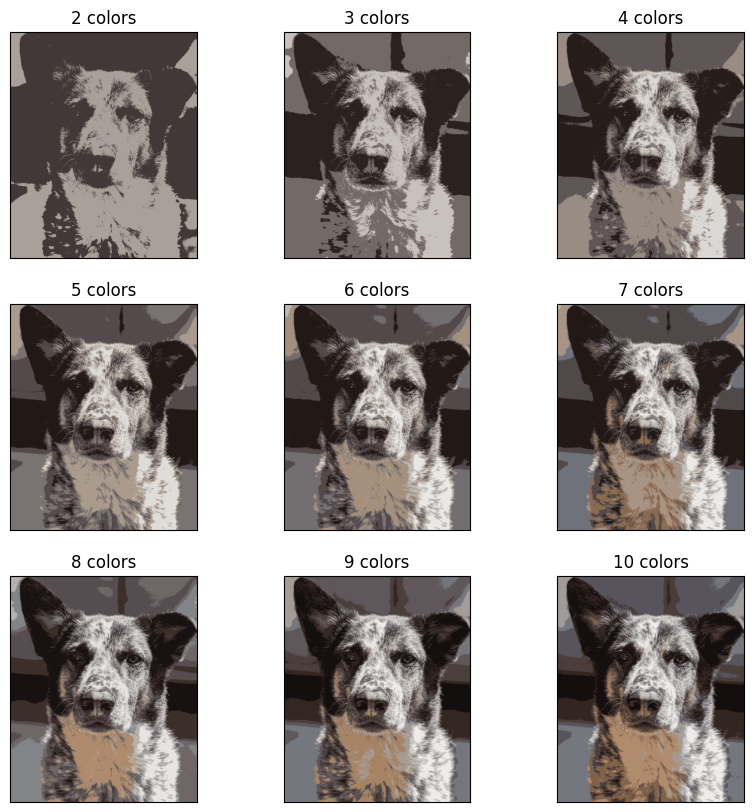

In [55]:
fig = k_means_image_comp(
    "imgs/Sherlock.jpg", 
    [2, 3, 4, 5, 6, 7, 8, 9, 10]
)
fig.savefig("imgs/k_means_Sherlocks.jpg")